In [64]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/WiljamiT/data-visualization/main/csv/autot.csv"
df = pd.read_csv(url, sep='\t')

df['Ft'] = df['Ft'].replace({'DIESEL': 'Diesel', 'PETROL': 'Petrol', 'NG': 'Natural gas'})

manufacturers_counts = df['Mh'].value_counts()
selected_manufacturers = manufacturers_counts[manufacturers_counts > 50].index
filtered_df = df[df['Mh'].isin(selected_manufacturers)].copy()

grouped_data = filtered_df.groupby(['Mh', 'Ft']).size().reset_index(name='count')

grouped_data.head(10)

,Mh,Ft,count
0,AUTOMOBILES CITROEN,Diesel,299
1,AUTOMOBILES CITROEN,Petrol,635
2,FORD WERKE GMBH,Diesel,165
3,FORD WERKE GMBH,Petrol,207
4,NISSAN,Diesel,21
5,NISSAN,Electric,7
6,NISSAN,Petrol,54
7,SKODA,Diesel,1332
8,SKODA,Natural gas,33
9,SKODA,Petrol,2187


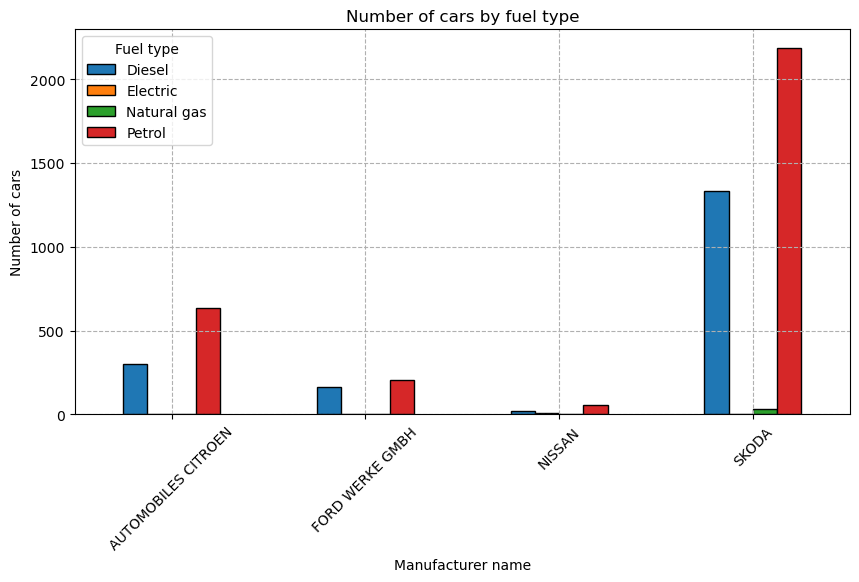

In [67]:
fig, ax = plt.subplots(figsize=(10, 5))
pivot_table = grouped_data.pivot_table('count', 'Mh', 'Ft')
pivot_table.plot(kind='bar', ax=ax, edgecolor='black')

ax.set_xlabel("Manufacturer name")
ax.set_ylabel("Number of cars")
ax.set_title("Number of cars by fuel type")

plt.xticks(rotation=45)

plt.grid(axis='x', linestyle='dashed')
plt.grid(axis='y', linestyle='dashed')

plt.legend(title="Fuel type")

plt.show()

## Figure 2
Histogram picture showing the distribution of 𝐶𝑂2 emissions **(column Enedc (g/km))** by 100 different reading ranges and a cumulative histogram of 𝐶𝑂2 emissions **(column Enedc (g/km))**. Taking into account the logarithmic scale for the probability density distributions.

In [70]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://student.labranet.jamk.fi/~huoptu/datananal_s20/kerta5/harjoitukset/autot.csv"
df = pd.read_csv(url, sep='\t')

manufacturers_counts = df['Mh'].value_counts()
selected_manufacturers = manufacturers_counts[manufacturers_counts > 50].index
filtered_df = df[df['Mh'].isin(selected_manufacturers)].copy()

filtered_df = filtered_df[filtered_df['Enedc (g/km)'] > 0]

filtered_df.head()

,ID,MS,Mp,VFN,Mh,Man,MMS,TAN,T,Va,...,Fm,ec (cm3),ep (KW),z (Wh/km),It,Ernedc (g/km),Erwltp (g/km),De,Vf,r
0,3142422,PL,VW GROUP PC,NaN,SKODA,SKODA AUTO AS,SKODA AUTO AS,e8*2007/46*0317*00,3T,AACZEAX01,...,M,1395.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,1
1,13048320,BE,VW GROUP PC,NaN,SKODA,SKODA AUTO AS,SKODA,e8*2007/46*0272*03,NU,ACDADAX0,...,M,1498.0,110.0,NaN,NaN,NaN,NaN,NaN,NaN,1
2,9455476,DE,VW GROUP PC,IP-08-TMB-2018-2148,SKODA,SKODA AUTO AS,SKODA (CZ),e8*2007/46*0249*08,NS,ACDFHAX1,...,M,1968.0,140.0,NaN,NaN,NaN,NaN,NaN,0.0,1
3,3142534,PL,VW GROUP PC,NaN,SKODA,SKODA AUTO AS,SKODA AUTO AS,e8*2007/46*0317*00,3T,ACCZEAX01,...,M,1395.0,92.0,NaN,NaN,NaN,NaN,NaN,NaN,1
4,9349418,DE,VW GROUP PC,NaN,SKODA,SKODA AUTO AS,SKODA (CZ),e11*2001/116*0291*53,5J,ACCUSBX01,...,M,1422.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,1


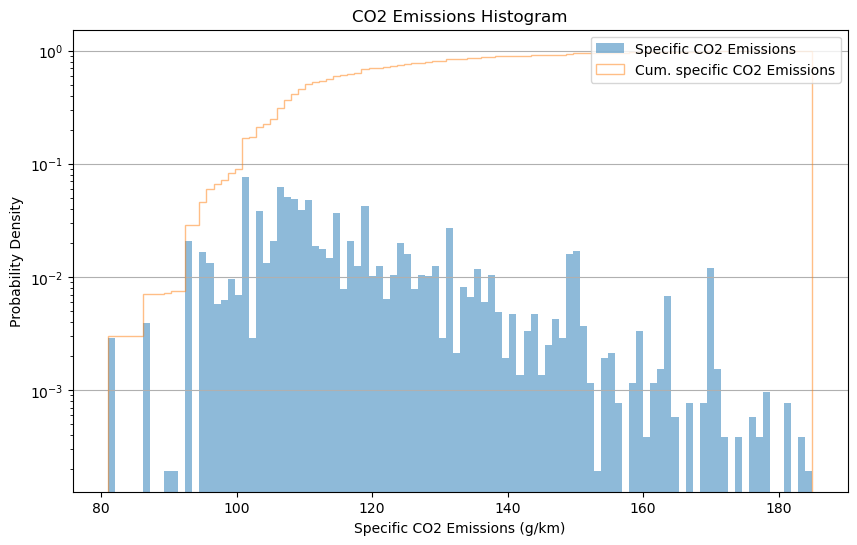

In [71]:
fig, ax = plt.subplots(figsize=(10, 6))

n, bins, patches = ax.hist(filtered_df['Enedc (g/km)'], bins=100, density=True, alpha=0.5, label='Specific CO2 Emissions')
ax.hist(filtered_df['Enedc (g/km)'], bins=bins, density=True, alpha=0.5, histtype='step', cumulative=True, label='Cum. specific CO2 Emissions')

ax.set_yscale('log')

ax.set_xlabel("Specific CO2 Emissions (g/km)")
ax.set_ylabel("Probability Density")
ax.set_title("CO2 Emissions Histogram")
plt.legend(loc='upper right')
plt.grid(axis='y')
plt.show()